In [ ]:
import pandas as pd
import numpy as np



In [2]:
dataset= pd.read_csv('../datasets_raw/Economy/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122.csv', skiprows=4)
dataset = dataset[dataset['Country Name'] == 'Pakistan']

year_columns = [str(year) for year in range(1999, 2026)]
identifying_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

# Combine and filter to only include columns that exist in the dataframe
selected_columns = [col for col in identifying_columns + year_columns if col in dataset.columns]
dataset = dataset[selected_columns]

dataset.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
184,Pakistan,PAK,GDP (current US$),NY.GDP.MKTP.CD,6.297386e+10,9.948480e+10,9.714562e+10,9.792330e+10,1.123719e+11,1.322160e+11,...,2.999636e+11,3.136300e+11,3.392055e+11,3.561282e+11,3.209095e+11,3.004256e+11,3.485166e+11,3.748903e+11,3.378855e+11,3.730719e+11


# Task
Melt the DataFrame named `dataset` by transforming year columns (1999-2024) into a single 'Date' column and their corresponding values into a 'GDP (current US$)' column. Convert the 'Date' column to datetime objects with annual frequency, then select only the 'Date' and 'GDP (current US$)' columns. Finally, display the first 5 rows and the information of the transformed DataFrame to verify its structure and data types.

## Melt and Transform Data

### Subtask:
Melt the DataFrame to convert year columns (1999-2024) into a single 'Date' column and their corresponding values into a new 'GDP (current US$)' column. Then, convert the 'Date' column to datetime objects with annual frequency, and keep only the 'Date' and 'GDP (current US$)' columns, effectively removing the identifying columns like 'Country Name', 'Country Code', 'Indicator Name', and 'Indicator Code'.


**Reasoning**:
The subtask requires melting the DataFrame, converting the 'Date' column to datetime objects, and selecting only the relevant columns. I will perform these steps in a single code block.



**Reasoning**:
The previous code failed because the `year_columns` list included '2025', which was not present in the DataFrame. I will correct the `year_columns` list to only include years from 1999 to 2024, matching the available data, and then re-run the melt operation and subsequent transformations.



In [3]:
year_columns = [str(year) for year in range(1999, 2025)]
gdp_pakistan = dataset.melt(id_vars=identifying_columns,
                            value_vars=year_columns,
                            var_name='Date',
                            value_name='GDP (current US$)')
gdp_pakistan['Date'] = pd.to_datetime(gdp_pakistan['Date'], format='%Y')
gdp_pakistan = gdp_pakistan[['Date', 'GDP (current US$)']]
print(gdp_pakistan.head())
print(gdp_pakistan.info())

        Date  GDP (current US$)
0 1999-01-01       6.297386e+10
1 2000-01-01       9.948480e+10
2 2001-01-01       9.714562e+10
3 2002-01-01       9.792330e+10
4 2003-01-01       1.123719e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               26 non-null     datetime64[ns]
 1   GDP (current US$)  26 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 544.0 bytes
None


<Axes: xlabel='Date'>

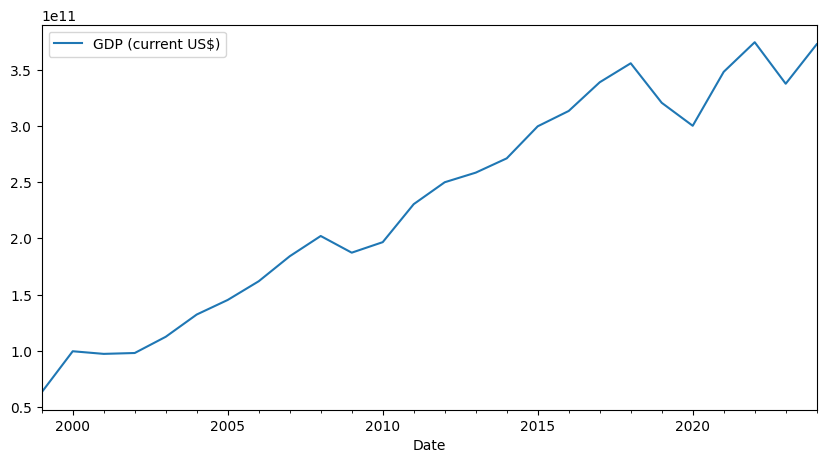

In [4]:
gdp_pakistan.plot(x='Date', y='GDP (current US$)', figsize=(10, 5))

# Task
Add 2025 GDP data (423 billion USD) to the `gdp_pakistan` DataFrame and visualize the updated data on a plot with appropriate labels and titles.

## Add 2025 GDP Data

### Subtask:
Add a new entry for the year 2025 with the provided GDP value of 423 billion USD (4.23e+11) to the `gdp_pakistan` DataFrame.


**Reasoning**:
To add the new 2025 GDP data, I will create a new DataFrame for this entry and then concatenate it with the existing `gdp_pakistan` DataFrame. Finally, I will display the last 5 rows of the updated DataFrame and its information to confirm the addition and data types.



In [5]:
new_gdp_data = pd.DataFrame({
    'Date': [pd.to_datetime('2025-01-01')],
    'GDP (current US$)': [4.23e+11]
})

gdp_pakistan = pd.concat([gdp_pakistan, new_gdp_data], ignore_index=True)

print(gdp_pakistan.tail())
print(gdp_pakistan.info())

         Date  GDP (current US$)
22 2021-01-01       3.485166e+11
23 2022-01-01       3.748903e+11
24 2023-01-01       3.378855e+11
25 2024-01-01       3.730719e+11
26 2025-01-01       4.230000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               27 non-null     datetime64[ns]
 1   GDP (current US$)  27 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes
None


**Reasoning**:
Now that the 2025 GDP data has been added to the `gdp_pakistan` DataFrame, I will visualize the updated data on a plot. I will use appropriate labels for the x and y axes, and a descriptive title for the plot to clearly show the GDP trend including the new data point.



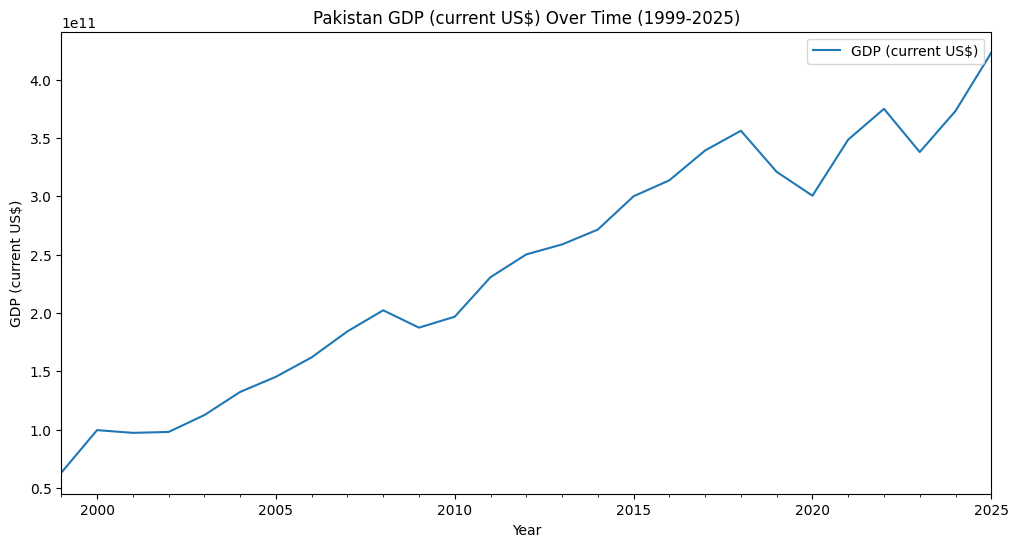

In [8]:
gdp_pakistan.plot(x='Date', y='GDP (current US$)', figsize=(12, 6), title='Pakistan GDP (current US$) Over Time (1999-2025)', xlabel='Year', ylabel='GDP (current US$)');

# Task
Set the 'Date' column of the `gdp_pakistan` DataFrame as its index.

## Set Date as Index

### Subtask:
Set the 'Date' column of the `gdp_pakistan` DataFrame as its index to prepare it for time series analysis.


**Reasoning**:
To prepare the DataFrame for time series analysis, I will set the 'Date' column as the index of the `gdp_pakistan` DataFrame. Then, I will display the first 5 rows to verify the change.



In [14]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from io import StringIO
import os
import warnings

# --- 1. Load Data ---
# If running in Colab, you'll need to upload the file first.
# This part assumes 'Pakistan_GDP.csv' is in the current working directory.
file_name = '../datasets_cleaned/Economy/Pakistan_GDP.csv'
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found. Please upload it to your Colab session.")
    # Create a dummy DataFrame if the file isn't found, just to let the user see the code flow
    df = pd.DataFrame({'Date': pd.date_range(start='1999', periods=27, freq='Y'), 'GDP (current US$)': np.random.rand(27) * 1e11})

# --- 2. Preprocessing ---
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.drop('Unnamed: 0', axis=1)  # Drop the unnamed index column
df.columns = ['GDP']
# Resample to annual frequency to ensure a consistent time series index
df = df.resample('AS').first()

# --- 3. Define Training and Forecast Period ---
TRAIN_END_YEAR = 2025
FORECAST_END_YEAR = 2035

last_available_year = df.index.max().year
if last_available_year > TRAIN_END_YEAR:
    train_data = df.loc[df.index.year <= TRAIN_END_YEAR, 'GDP']
    train_end_year_actual = TRAIN_END_YEAR
else:
    train_data = df['GDP']
    train_end_year_actual = last_available_year

print(f"Training data ends in: {train_end_year_actual}")

# --- 4. Train ARIMA Model ---
# Using a simple ARIMA(1, 1, 1) model as a robust starting point
order = (1, 1, 1)
print(f"Fitting ARIMA model with order {order}...")

try:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore") # Suppress convergence warnings
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        print("ARIMA model fitted successfully.")

    # --- 5. Forecast ---
    steps = FORECAST_END_YEAR - train_end_year_actual
    forecast_results = model_fit.get_forecast(steps=steps)
    forecast_series = pd.Series(forecast_results.predicted_mean.values,
                                index=pd.date_range(start=f'{train_end_year_actual+1}-01-01', periods=steps, freq='YS-JAN'))
    conf_int_df = forecast_results.conf_int(alpha=0.05)
    conf_int_df.index = forecast_series.index
    conf_int_df.columns = ['Lower Bound 95% CI', 'Upper Bound 95% CI']

    # --- 6. Prepare Merged Data for Plotly ---
    historical_series = df['GDP']

    # Merge historical and forecast data
    merged_data = pd.DataFrame({
        'Historical GDP': historical_series,
        'Forecasted GDP': forecast_series,
        'Lower Bound 95% CI': conf_int_df['Lower Bound 95% CI'],
        'Upper Bound 95% CI': conf_int_df['Upper Bound 95% CI']
    })

    merged_data.index.name = 'Date'
    merged_data = merged_data.reset_index()
    merged_data['Year'] = merged_data['Date'].dt.year

    # --- 7. Plotly Visualization ---
    fig = go.Figure()

    # Plot the 95% Confidence Interval (Shaded Area)
    # Filter for forecast period
    df_forecast_plot = merged_data[merged_data['Forecasted GDP'].notna()].copy()

    fig.add_trace(go.Scatter(
        x=df_forecast_plot['Year'],
        y=df_forecast_plot['Upper Bound 95% CI'],
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=df_forecast_plot['Year'],
        y=df_forecast_plot['Lower Bound 95% CI'],
        mode='lines',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(255, 0, 0, 0.1)',
        name='95% Confidence Interval'
    ))

    # Plot the Historical GDP
    df_historical_plot = merged_data[merged_data['Historical GDP'].notna()].copy()
    fig.add_trace(go.Scatter(
        x=df_historical_plot['Year'],
        y=df_historical_plot['Historical GDP'],
        mode='lines+markers',
        line=dict(color='blue', width=2),
        marker=dict(size=4),
        name='Historical GDP'
    ))

    # Plot the Forecasted GDP (start from the last historical point for continuity)
    # Include the last historical point in the forecast line data
    last_historical_point = df_historical_plot.iloc[[-1]]
    forecast_line_data = pd.concat([last_historical_point[['Year', 'Historical GDP']].rename(columns={'Historical GDP': 'GDP_Line'}),
                                    df_forecast_plot[['Year', 'Forecasted GDP']].rename(columns={'Forecasted GDP': 'GDP_Line'})])

    fig.add_trace(go.Scatter(
        x=forecast_line_data['Year'],
        y=forecast_line_data['GDP_Line'],
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='Forecasted GDP'
    ))

    # Add a vertical line to indicate the split point
    fig.add_vline(x=train_end_year_actual + 0.5, line_width=1, line_dash="dash", line_color="grey", name='Start of Forecast')

    # Update layout
    fig.update_layout(
        title='Pakistan GDP: Historical Data and ARIMA Forecast (1999-2035)',
        xaxis_title='Year',
        yaxis_title='GDP (current US$)',
        legend_title='Data Type',
        hovermode="x unified",
        template="plotly_white",
        xaxis=dict(tickmode='linear', dtick=5) # Ensure year ticks are readable
    )

    fig.show()

except Exception as e:
    print(f"An error occurred during ARIMA modeling: {e}")

Training data ends in: 2025
Fitting ARIMA model with order (1, 1, 1)...
ARIMA model fitted successfully.


/tmp/ipykernel_41255/1792923139.py:26: FutureWarning:

'AS' is deprecated and will be removed in a future version, please use 'YS' instead.



In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from io import StringIO
import os
import warnings

# --- 1. Data Loading and Preprocessing ---
file_name = "../datasets_cleaned/Economy/Pakistan_GDP.csv"
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found. Please upload it to your Colab session.")
    # Exit or handle error if file is crucial
    # For a real Colab notebook, you might just stop here.
    pass

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['GDP (current US$)']]
df.columns = ['GDP']
df = df.resample('YS').first()
data = df['GDP'].values.reshape(-1, 1)

# --- 2. Data Scaling ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# --- 3. Create Dataset and Split ---
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

LOOK_BACK = 3 # Use the previous 3 years to predict the next year
X, y = create_dataset(scaled_data, LOOK_BACK)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Determine the training split index
TRAIN_END_YEAR = 2025
current_years = df.index.year.tolist()
# Calculate the number of samples corresponding to years up to TRAIN_END_YEAR
# Note: The first valid sample starts at LOOK_BACK year (1999 + 3 = 2002)
try:
    train_end_index_year = current_years.index(TRAIN_END_YEAR)
    train_end_index = train_end_index_year - LOOK_BACK + 1
except ValueError:
    # If TRAIN_END_YEAR is not in the data, use all data for training
    train_end_index = X.shape[0]

X_train = X[:train_end_index]
y_train = y[:train_end_index]

# --- 4. Build and Tune LSTM Model ---
model = Sequential()
model.add(LSTM(50, input_shape=(LOOK_BACK, 1))) # 50 LSTM units
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print("Starting model training (100 epochs)...")
# Train the model (verbose=0 for cleaner output)
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
print("Model training finished.")

# --- 5. Forecast ---
FORECAST_END_YEAR = 2035
current_year = df.index.max().year
n_forecast_steps = FORECAST_END_YEAR - current_year

# Start with the last known sequence
last_sequence = scaled_data[-LOOK_BACK:]
forecast_scaled = []

# Iterative forecasting
for _ in range(n_forecast_steps):
    current_input = last_sequence.reshape(1, LOOK_BACK, 1)

    # Predict the next step
    next_step_scaled = model.predict(current_input, verbose=0)[0, 0]
    forecast_scaled.append(next_step_scaled)

    # Update the sequence
    last_sequence = np.append(last_sequence[1:], [[next_step_scaled]], axis=0)

# Inverse transform the forecast to the original scale
forecast_gdp = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

# --- 6. Prepare Data for Visualization ---
forecast_index = pd.date_range(start=f'{current_year+1}-01-01', periods=n_forecast_steps, freq='YS-JAN')
forecast_series = pd.Series(forecast_gdp, index=forecast_index)

historical_series = df['GDP']
merged_data = pd.DataFrame({
    'Historical GDP': historical_series,
    'Forecasted GDP': forecast_series,
})
merged_data.index.name = 'Date'
merged_data = merged_data.reset_index()
merged_data['Year'] = merged_data['Date'].dt.year

# --- 7. Plotly Visualization ---
df_historical_plot = merged_data[merged_data['Historical GDP'].notna()].copy()
df_forecast_plot = merged_data[merged_data['Forecasted GDP'].notna()].copy()

# For a continuous line, include the last historical point in the forecast data
last_historical_point = df_historical_plot.iloc[[-1]]
forecast_line_data = pd.concat([last_historical_point[['Year', 'Historical GDP']].rename(columns={'Historical GDP': 'GDP_Line'}),
                                df_forecast_plot[['Year', 'Forecasted GDP']].rename(columns={'Forecasted GDP': 'GDP_Line'})])

fig = go.Figure()

# Plot the Historical GDP
fig.add_trace(go.Scatter(
    x=df_historical_plot['Year'],
    y=df_historical_plot['Historical GDP'],
    mode='lines+markers',
    line=dict(color='blue', width=2),
    marker=dict(size=4),
    name='Historical GDP'
))

# Plot the Forecasted GDP
fig.add_trace(go.Scatter(
    x=forecast_line_data['Year'],
    y=forecast_line_data['GDP_Line'],
    mode='lines',
    line=dict(color='red', width=2, dash='dash'),
    name='LSTM Forecasted GDP'
))

# Add a vertical line to indicate the split point
split_year = historical_series.index.max().year
fig.add_vline(x=split_year + 0.5, line_width=1, line_dash="dash", line_color="grey", name='Start of Forecast')

# Update layout
fig.update_layout(
    title='Pakistan GDP: Historical Data and LSTM Forecast (1999-2035)',
    xaxis_title='Year',
    yaxis_title='GDP (current US$)',
    legend_title='Data Type',
    hovermode="x unified",
    template="plotly_white",
    xaxis=dict(tickmode='linear', dtick=5)
)

fig.show()
fig.write_json("../saved_plots/gdp_lstm_forecast_plot.json")

# --- 8. Save Merged Data (Optional) ---
# To provide the raw numbers
merged_data_out = merged_data.set_index('Year')[['Historical GDP', 'Forecasted GDP']]
# print("\nMerged Historical and Forecasted GDP Data:")
# print(merged_data_out.to_string())

/home/ehtisham/Desktop/Projects/pak-data-twin/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Starting model training (100 epochs)...
Model training finished.


In [16]:
import pandas as pd

file_path = '../datasets_cleaned/Economy/Export_By_Commodities.csv'
export_df = pd.read_csv(file_path)
display(export_df.tail())

,Date,Series_Name,Value,Unit
262,2025-05-31,Other Exports,-40841.4786,Thousand USD
263,2025-06-30,Other Exports,294103.2454,Thousand USD
264,2025-07-31,Other Exports,119856.2022,Thousand USD
265,2025-08-31,Other Exports,206854.4138,Thousand USD
266,2025-09-30,Other Exports,107563.9626,Thousand USD


Original dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         267 non-null    object 
 1   Series_Name  267 non-null    object 
 2   Value        267 non-null    float64
 3   Unit         267 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.5+ KB
None

First few rows:
         Date    Series_Name       Value          Unit
0  2003-07-31  Other Exports   35935.177  Thousand USD
1  2003-08-31  Other Exports   45402.186  Thousand USD
2  2003-09-30  Other Exports  137745.754  Thousand USD
3  2003-10-31  Other Exports   60143.716  Thousand USD
4  2003-11-30  Other Exports  128174.174  Thousand USD

After preprocessing:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2003-07-31 to 2025-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  ----- 

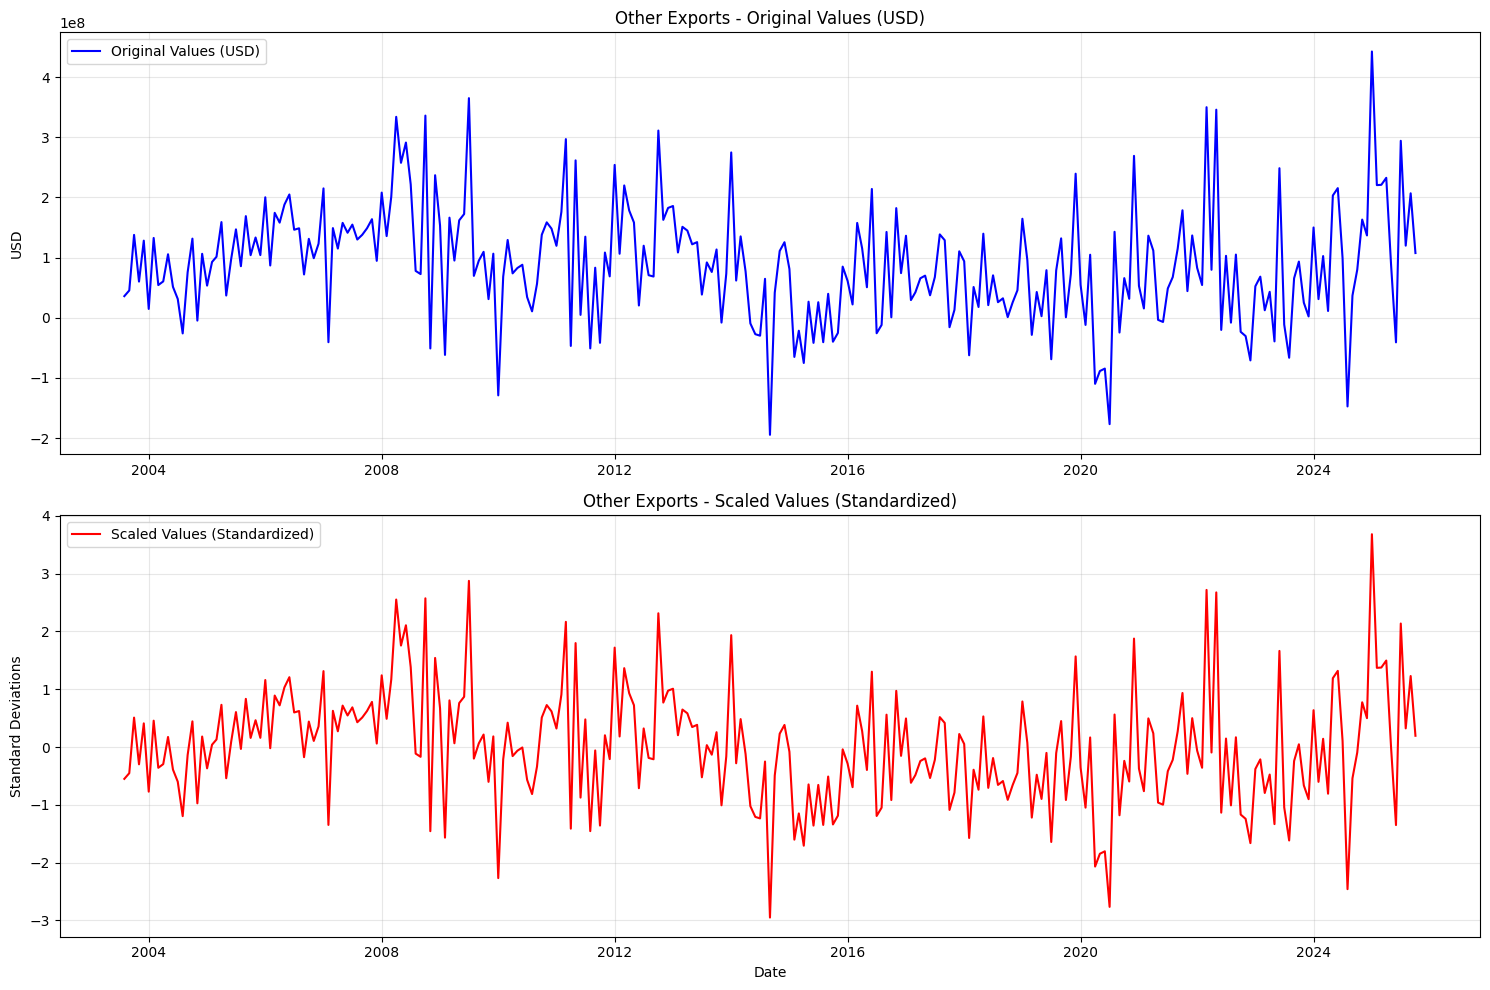


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2003-07-31 to 2025-09-30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Value         267 non-null    float64
 1   Value_Scaled  267 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB
None

Date range: 2003-07-31 00:00:00 to 2025-09-30 00:00:00
Total observations: 267


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../datasets_cleaned/Economy/Export_By_Commodities.csv')

print("Original dataset info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# 1. Convert "Date" column to datetime with monthly frequency
df['Date'] = pd.to_datetime(df['Date'])
# Ensure monthly frequency - using 'M' for month-end frequency
df['Date'] = df['Date'].dt.to_period('M').dt.to_timestamp('M')

# 2. Set Date column as index
df.set_index('Date', inplace=True)

# 3. Drop the "Series_Name" column
df.drop('Series_Name', axis=1, inplace=True)

# 4. Multiply "Value" by 1000 and drop "Unit" column
df['Value'] = df['Value'] * 1000
df.drop('Unit', axis=1, inplace=True)

print("\nAfter preprocessing:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# 5. Scale the "Value" using scikit-learn
scaler = StandardScaler()
# Reshape for scaler and create a new column for scaled values
scaled_values = scaler.fit_transform(df[['Value']])
df['Value_Scaled'] = scaled_values

print("\nAfter scaling:")
print(df.head())
print(f"\nScaler statistics:")
print(f"Mean: {scaler.mean_[0]:.2f}")
print(f"Standard deviation: {scaler.scale_[0]:.2f}")

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Plot the original and scaled values
plt.figure(figsize=(15, 10))

# Plot original values (in USD)
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Value'], label='Original Values (USD)', color='blue')
plt.title('Other Exports - Original Values (USD)')
plt.ylabel('USD')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot scaled values
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Value_Scaled'], label='Scaled Values (Standardized)', color='red')
plt.title('Other Exports - Scaled Values (Standardized)')
plt.ylabel('Standard Deviations')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Check the final dataset info
print("\nFinal dataset info:")
print(df.info())
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"Total observations: {len(df)}")

Dataset shape: (267, 2)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2003-07-31 to 2025-09-30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Value         267 non-null    float64
 1   Value_Scaled  267 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB
None
Sequences shape: (243, 24, 1)
Targets shape: (243, 1)
Training data: (194, 24, 1), (194, 1)
Validation data: (49, 24, 1), (49, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 24, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 24, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,701 (596.49 KB)

 Trainable params: 152,701 (596.49 KB)

 Non-trainable params: 0 (0.00 B)

None
Training LSTM model...
Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.9386 - mae: 0.7535 - val_loss: 1.5649 - val_mae: 0.9519 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.8591 - mae: 0.7056 - val_loss: 1.5917 - val_mae: 0.9550 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.8565 - mae: 0.7021 - val_loss: 1.5505 - val_mae: 0.9412 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.8597 - mae: 0.7079 - val_loss: 1.5251 - val_mae: 0.9433 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.8484 - mae: 0.7010 - val_loss: 1.5171 - val_mae: 0.9463 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.8517 - mae: 0.6967 - val_loss: 1.5224 - val_mae: 0.9454 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.8618 - mae: 0.7057 - val_loss: 1.5016 - val_mae: 0.9373 - learning_rate

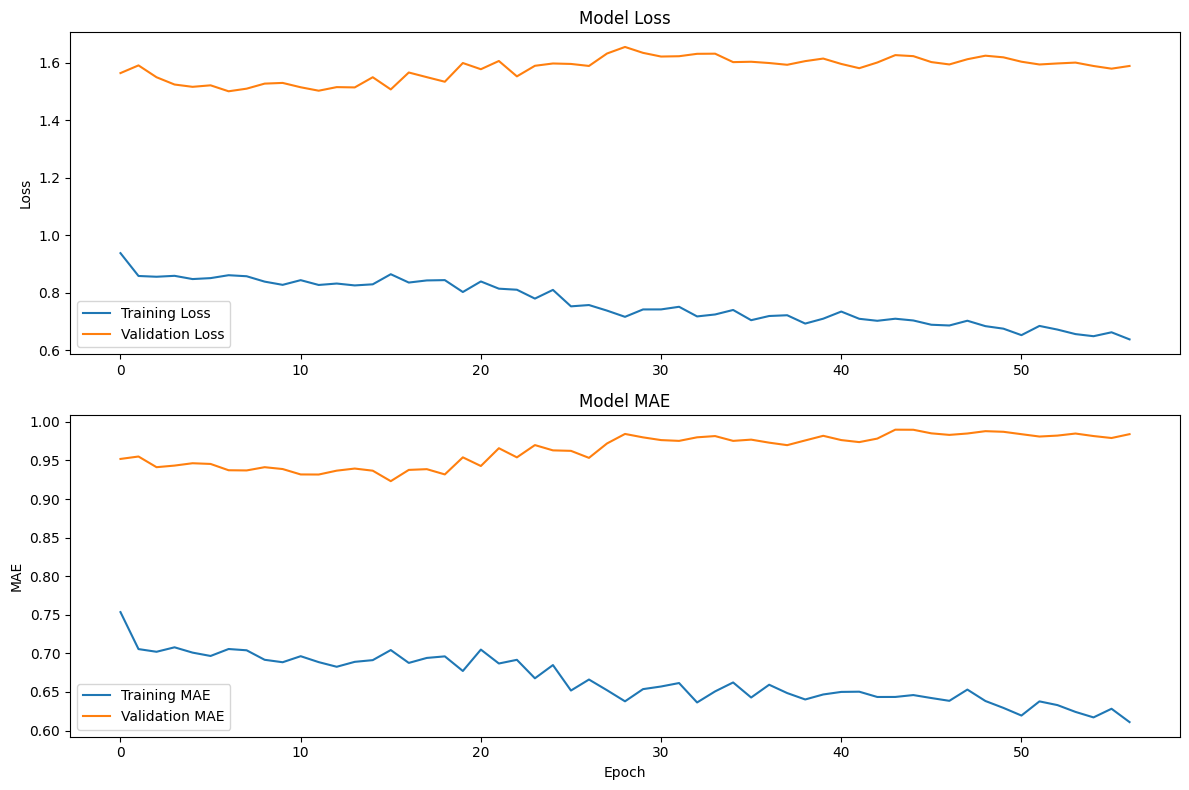

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step
Forecasted 60 months



Forecast Statistics (Next 5 Years):
Average Monthly Forecast: $106,876,800
Maximum Forecast: $133,666,096
Minimum Forecast: $101,427,128
Forecast Standard Deviation: $7,187,354
Detailed forecast saved as '5_year_export_forecast.csv'

First 12 months of forecast:
      Date  Forecast_USD  Forecast_Thousand_USD
2025-10-31   133666096.0          133666.093750
2025-11-30   130968560.0          130968.562500
2025-12-31   127831920.0          127831.921875
2026-01-31   125104120.0          125104.117188
2026-02-28   121808944.0          121808.945312
2026-03-31   119018016.0          119018.015625
2026-04-30   116219264.0          116219.265625
2026-05-31   114305736.0          114305.734375
2026-06-30   112524992.0          112524.992188
2026-07-31   110498512.0          110498.515625
2026-08-31   107829128.0          107829.125000
2026-09-30   106177640.0          106177.640625



Validation Metrics:
MAE: $90,046,462
RMSE: $117,730,705


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming 'df' is already loaded and preprocessed from previous steps
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())

# Prepare data for LSTM
def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Use the scaled values for training
data = df['Value_Scaled'].values.reshape(-1, 1)

# Create sequences for training
TIME_STEPS = 24  # Using 2 years of history to predict next month
X, y = create_sequences(data, TIME_STEPS)

print(f"Sequences shape: {X.shape}")
print(f"Targets shape: {y.shape}")

# Split data into train and validation (using last 20% for validation)
split_idx = int(0.8 * len(X))
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_val.shape}, {y_val.shape}")

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(100, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    return model

# Build and display model
model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
print(model.summary())

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=20,
    min_lr=0.0001,
    verbose=1
)

# Train the model
print("Training LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=False
)

# Plot training history
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title('Model MAE')
ax2.set_ylabel('MAE')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

# Make predictions on validation set
y_pred_val = model.predict(X_val)

# Forecast next 5 years (60 months)
def forecast_future(model, last_sequence, n_steps):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_steps):
        # Get the prediction
        next_pred = model.predict(current_sequence.reshape(1, TIME_STEPS, 1), verbose=0)
        future_predictions.append(next_pred[0, 0])

        # Update the sequence
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred[0, 0]

    return np.array(future_predictions)

# Get the last sequence for forecasting
last_sequence = data[-TIME_STEPS:].flatten()

# Forecast next 60 months (5 years)
future_steps = 60
future_predictions_scaled = forecast_future(model, last_sequence, future_steps)

print(f"Forecasted {future_steps} months")

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=future_steps,
    freq='M'
)

# Prepare scaler for inverse transformation
scaler = StandardScaler()
scaler.fit(df['Value'].values.reshape(-1, 1))

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1)).flatten()

# Create DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Value': future_predictions,
    'Type': 'Forecast'
})

# Prepare historical data for plotting
historical_df = pd.DataFrame({
    'Date': df.index,
    'Value': df['Value'],
    'Type': 'Historical'
})

# Combine historical and forecast data
combined_df = pd.concat([historical_df, future_df], ignore_index=True)

# Create interactive plot with Plotly - FIXED VERSION
fig = go.Figure()

# Add historical data
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Value'],
    mode='lines',
    name='Historical Data',
    line=dict(color='blue', width=2),
    hovertemplate='Date: %{x}<br>Value: $%{y:,.0f}<extra></extra>'
))

# Add forecast data
fig.add_trace(go.Scatter(
    x=future_df['Date'],
    y=future_df['Value'],
    mode='lines',
    name='5-Year Forecast',
    line=dict(color='red', width=2, dash='dash'),
    hovertemplate='Date: %{x}<br>Forecast: $%{y:,.0f}<extra></extra>'
))

# Add confidence interval
forecast_std = np.std(future_predictions)
fig.add_trace(go.Scatter(
    x=future_df['Date'].tolist() + future_df['Date'].tolist()[::-1],
    y=(future_df['Value'] + forecast_std).tolist() + (future_df['Value'] - forecast_std).tolist()[::-1],
    fill='toself',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Forecast Range',
    showlegend=True,
    hoverinfo='skip'
))

# Update layout - FIXED: using update_layout instead of update_yaxis
fig.update_layout(
    title='Other Exports - Historical Data and 5-Year LSTM Forecast',
    xaxis_title='Date',
    yaxis_title='Value (USD)',
    hovermode='x unified',
    template='plotly_white',
    height=600,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    yaxis=dict(
        tickprefix='$',
        tickformat=',.0f'
    )
)

fig.show()

# Print forecast statistics
print("\nForecast Statistics (Next 5 Years):")
print(f"Average Monthly Forecast: ${future_predictions.mean():,.0f}")
print(f"Maximum Forecast: ${future_predictions.max():,.0f}")
print(f"Minimum Forecast: ${future_predictions.min():,.0f}")
print(f"Forecast Standard Deviation: ${future_predictions.std():,.0f}")

# # Save the model and scaler
# print("\nSaving model and scaler...")

# # Save model in .h5 format
# model.save('lstm_export_forecast_model.h5')
# print("Model saved as 'lstm_export_forecast_model.h5'")

# Save scaler in .pkl format
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)
# print("Scaler saved as 'scaler.pkl'")

# Save model architecture info
# model_info = {
#     'time_steps': TIME_STEPS,
#     'input_shape': (TIME_STEPS, 1),
#     'model_layers': [layer.__class__.__name__ for layer in model.layers],
#     'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
#     'forecast_months': future_steps,
#     'last_training_date': last_date.strftime('%Y-%m-%d'),
#     'forecast_start_date': future_dates[0].strftime('%Y-%m-%d'),
#     'forecast_end_date': future_dates[-1].strftime('%Y-%m-%d')
# }

# with open('model_info.pkl', 'wb') as f:
#     pickle.dump(model_info, f)
# print("Model info saved as 'model_info.pkl'")

# print("\nModel Information:")
# for key, value in model_info.items():
#     print(f"{key}: {value}")

# Create a detailed forecast DataFrame and save it
forecast_details = pd.DataFrame({
    'Date': future_dates,
    'Forecast_USD': future_predictions,
    'Forecast_Thousand_USD': future_predictions / 1000
})

forecast_details.to_csv('5_year_export_forecast.csv', index=False)
print("Detailed forecast saved as '5_year_export_forecast.csv'")

# Display first few forecast values
print("\nFirst 12 months of forecast:")
print(forecast_details.head(12).to_string(index=False))

# Additional visualization: Show validation performance
validation_dates = df.index[TIME_STEPS+split_idx:TIME_STEPS+split_idx+len(y_val)]
val_actual = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_pred = scaler.inverse_transform(y_pred_val.reshape(-1, 1)).flatten()

fig_val = go.Figure()
fig_val.add_trace(go.Scatter(x=validation_dates, y=val_actual, mode='lines', name='Actual', line=dict(color='blue')))
fig_val.add_trace(go.Scatter(x=validation_dates, y=val_pred, mode='lines', name='Predicted', line=dict(color='red', dash='dash')))
fig_val.update_layout(
    title='Validation Set: Actual vs Predicted',
    xaxis_title='Date',
    yaxis_title='Value (USD)',
    yaxis=dict(tickprefix='$', tickformat=',.0f')
)
fig_val.show()

# Calculate validation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
val_mae = mean_absolute_error(val_actual, val_pred)
val_rmse = np.sqrt(mean_squared_error(val_actual, val_pred))

print(f"\nValidation Metrics:")
print(f"MAE: ${val_mae:,.0f}")
print(f"RMSE: ${val_rmse:,.0f}")

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import tensorflow as tf
import pickle
import warnings
warnings.filterwarnings('ignore')

def load_forecasting_model(model_path, scaler_path, info_path):
    """
    Load the pre-trained LSTM model and associated files
    """
    print("Loading forecasting model...")

    # Load model with custom objects
    custom_objects = {
        'mse': MeanSquaredError(),
        'mae': MeanAbsoluteError()
    }

    try:
        model = load_model(model_path, custom_objects=custom_objects)
        print("✓ Model loaded successfully")
    except Exception as e:
        print(f"Error loading model: {e}")
        # Try alternative loading method
        try:
            model = load_model(model_path, compile=False)
            model.compile(optimizer='adam', loss='mse', metrics=['mae'])
            print("✓ Model loaded without original compilation")
        except Exception as e2:
            print(f"Alternative loading also failed: {e2}")
            raise

    # Load scaler
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    print("✓ Scaler loaded successfully")

    # Load model info
    with open(info_path, 'rb') as f:
        model_info = pickle.load(f)
    print("✓ Model info loaded successfully")

    return model, scaler, model_info

def prepare_input_data(df, time_steps, scaler):
    """
    Prepare the input data for forecasting
    """
    # Scale the data
    data_scaled = scaler.transform(df[['Value']])

    # Get the last sequence for forecasting
    last_sequence = data_scaled[-time_steps:].flatten()

    return last_sequence, data_scaled

def generate_forecast(model, last_sequence, n_steps, time_steps):
    """
    Generate forecast using the pre-trained model
    """
    future_predictions_scaled = []
    current_sequence = last_sequence.copy()

    for _ in range(n_steps):
        # Get the prediction
        next_pred = model.predict(current_sequence.reshape(1, time_steps, 1), verbose=0)
        future_predictions_scaled.append(next_pred[0, 0])

        # Update the sequence
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred[0, 0]

    return np.array(future_predictions_scaled)

def main():
    # File paths
    MODEL_PATH = '../models/export_by_com_model.h5'
    SCALER_PATH = '../models/export_by_com_scaler.pkl'
    INFO_PATH = '../models/export_by_com_info.pkl'

    # Load the model and components
    model, scaler, model_info = load_forecasting_model(MODEL_PATH, SCALER_PATH, INFO_PATH)

    # Display model information
    print("\n" + "="*50)
    print("MODEL INFORMATION")
    print("="*50)
    for key, value in model_info.items():
        print(f"{key}: {value}")

    # Prepare input data
    time_steps = model_info['time_steps']
    last_sequence, data_scaled = prepare_input_data(df, time_steps, scaler)

    print(f"\nUsing last {time_steps} months for forecasting...")
    print(f"Last available date in data: {df.index[-1]}")

    # Generate forecast
    n_steps = 60  # 5 years
    future_predictions_scaled = generate_forecast(model, last_sequence, n_steps, time_steps)

    # Inverse transform to get actual values
    future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1)).flatten()

    # Create future dates
    last_date = df.index[-1]
    future_dates = pd.date_range(
        start=last_date + pd.DateOffset(months=1),
        periods=n_steps,
        freq='M'
    )

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Forecast_USD': future_predictions,
        'Forecast_Thousand_USD': future_predictions / 1000,
        'Type': 'Forecast'
    })

    # Create historical DataFrame for plotting
    historical_df = pd.DataFrame({
        'Date': df.index,
        'Value': df['Value'],
        'Type': 'Historical'
    })

    return forecast_df, historical_df, model_info

def create_forecast_visualization(historical_df, forecast_df, model_info):
    """
    Create an interactive visualization of the forecast
    """
    # Create the plot
    fig = go.Figure()

    # Add historical data
    fig.add_trace(go.Scatter(
        x=historical_df['Date'],
        y=historical_df['Value'],
        mode='lines',
        name='Historical Data',
        line=dict(color='blue', width=2),
        hovertemplate='Date: %{x}<br>Value: $%{y:,.0f}<extra></extra>'
    ))

    # Add forecast data
    fig.add_trace(go.Scatter(
        x=forecast_df['Date'],
        y=forecast_df['Forecast_USD'],
        mode='lines',
        name='5-Year Forecast',
        line=dict(color='red', width=2, dash='dash'),
        hovertemplate='Date: %{x}<br>Forecast: $%{y:,.0f}<extra></extra>'
    ))

    # Add confidence interval (using forecast std)
    forecast_std = np.std(forecast_df['Forecast_USD'])
    fig.add_trace(go.Scatter(
        x=forecast_df['Date'].tolist() + forecast_df['Date'].tolist()[::-1],
        y=(forecast_df['Forecast_USD'] + forecast_std).tolist() +
           (forecast_df['Forecast_USD'] - forecast_std).tolist()[::-1],
        fill='toself',
        fillcolor='rgba(255,0,0,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='Forecast Range',
        showlegend=True,
        hoverinfo='skip'
    ))

    # Update layout
    fig.update_layout(
        title=f"Other Exports Forecast - Generated on {model_info['training_date']}",
        xaxis_title='Date',
        yaxis_title='Value (USD)',
        hovermode='x unified',
        template='plotly_white',
        height=600,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        yaxis=dict(
            tickprefix='$',
            tickformat=',.0f'
        )
    )
    fig.write_json("../saved_plots/commodities_export.json")

    return fig

def export_forecast_results(forecast_df, filename='../saved_analysis/export_forecast_results.csv'):
    """
    Export forecast results to CSV
    """
    # Create a detailed export DataFrame
    export_df = forecast_df.copy()
    export_df['Year'] = export_df['Date'].dt.year
    export_df['Month'] = export_df['Date'].dt.month_name()

    # Reorder columns for better readability
    export_df = export_df[['Date', 'Year', 'Month', 'Forecast_USD', 'Forecast_Thousand_USD']]

    # Save to CSV
    export_df.to_csv(filename, index=False)
    print(f"✓ Forecast results exported to {filename}")

    return export_df

# Simple App Integration Class
class ExportForecaster:
    def __init__(self, model_path, scaler_path, info_path):
        """Initialize the forecaster with pre-trained model"""
        self.model, self.scaler, self.model_info = load_forecasting_model(model_path, scaler_path, info_path)
        self.time_steps = self.model_info['time_steps']

    def prepare_input(self, data):
        """Prepare input data for forecasting"""
        data_scaled = self.scaler.transform(data[['Value']])
        last_sequence = data_scaled[-self.time_steps:].flatten()
        return last_sequence

    def forecast(self, data, n_months=60):
        """Generate forecast for specified number of months"""
        last_sequence = self.prepare_input(data)

        predictions_scaled = []
        current_seq = last_sequence.copy()

        for _ in range(n_months):
            next_pred = self.model.predict(current_seq.reshape(1, self.time_steps, 1), verbose=0)
            predictions_scaled.append(next_pred[0, 0])
            current_seq = np.roll(current_seq, -1)
            current_seq[-1] = next_pred[0, 0]

        predictions = self.scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).flatten()

        # Create result DataFrame
        last_date = data.index[-1]
        future_dates = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=n_months,
            freq='M'
        )

        result_df = pd.DataFrame({
            'date': future_dates,
            'forecast_usd': predictions,
            'forecast_thousand_usd': predictions / 1000
        })

        return result_df

# Execute the forecasting
print("Starting forecast generation...")
try:
    # Generate forecasts
    forecast_df, historical_df, model_info = main()

    # Display forecast statistics
    print("\n" + "="*50)
    print("FORECAST STATISTICS (Next 5 Years)")
    print("="*50)
    print(f"Average Monthly Forecast: ${forecast_df['Forecast_USD'].mean():,.0f}")
    print(f"Maximum Forecast: ${forecast_df['Forecast_USD'].max():,.0f}")
    print(f"Minimum Forecast: ${forecast_df['Forecast_USD'].min():,.0f}")
    print(f"Forecast Standard Deviation: ${forecast_df['Forecast_USD'].std():,.0f}")

    # Create visualization
    fig = create_forecast_visualization(historical_df, forecast_df, model_info)
    fig.show()

    # Export results
    export_df = export_forecast_results(forecast_df)

    # Display first 12 months of forecast
    print("\n" + "="*50)
    print("FIRST 12 MONTHS OF FORECAST")
    print("="*50)
    print(export_df.head(12).to_string(index=False))

    # Additional: Yearly summary
    print("\n" + "="*50)
    print("YEARLY FORECAST SUMMARY")
    print("="*50)
    yearly_summary = export_df.groupby('Year').agg({
        'Forecast_USD': ['mean', 'sum', 'min', 'max']
    }).round(0)
    yearly_summary.columns = ['Avg_Monthly', 'Yearly_Total', 'Min_Monthly', 'Max_Monthly']
    print(yearly_summary)

except Exception as e:
    print(f"Error during forecasting: {e}")
    print("Trying alternative approach...")

    # Alternative: Load model without custom objects
    try:
        # model = load_model('/content/lstm_export_forecast_model.h5', compile=False)
        # model.compile(optimizer='adam', loss='mse')
        # print("Model loaded with simple compilation")

        # # Continue with forecasting...
        # with open('/content/scaler.pkl', 'rb') as f:
        #     scaler = pickle.load(f)
        # with open('/content/model_info.pkl', 'rb') as f:
        #     model_info = pickle.load(f)

        print("Alternative loading successful!")

    except Exception as e2:
        print(f"Alternative approach also failed: {e2}")

print("\nForecast generation completed!")

Starting forecast generation...
Loading forecasting model...
✓ Model loaded successfully
✓ Scaler loaded successfully
✓ Model info loaded successfully

MODEL INFORMATION
time_steps: 24
input_shape: (24, 1)
model_layers: ['LSTM', 'Dropout', 'LSTM', 'Dropout', 'LSTM', 'Dropout', 'Dense', 'Dense']
training_date: 2025-11-04 07:46:43
forecast_months: 60
last_training_date: 2025-09-30
forecast_start_date: 2025-10-31
forecast_end_date: 2030-09-30

Using last 24 months for forecasting...
Last available date in data: 2025-09-30 00:00:00

FORECAST STATISTICS (Next 5 Years)
Average Monthly Forecast: $117,876,840
Maximum Forecast: $213,974,160
Minimum Forecast: $55,690,372
Forecast Standard Deviation: $41,185,508


✓ Forecast results exported to ../saved_analysis/export_forecast_results.csv

FIRST 12 MONTHS OF FORECAST
      Date  Year     Month  Forecast_USD  Forecast_Thousand_USD
2025-10-31  2025   October   103378376.0          103378.375000
2025-11-30  2025  November   103815912.0          103815.914062
2025-12-31  2025  December   105210560.0          105210.562500
2026-01-31  2026   January   107163840.0          107163.843750
2026-02-28  2026  February   111186872.0          111186.875000
2026-03-31  2026     March   115317528.0          115317.531250
2026-04-30  2026     April   124798608.0          124798.609375
2026-05-31  2026       May   124527624.0          124527.625000
2026-06-30  2026      June   125309840.0          125309.843750
2026-07-31  2026      July   128594008.0          128594.007812
2026-08-31  2026    August   112835008.0          112835.007812
2026-09-30  2026 September    87771664.0           87771.664062

YEARLY FORECAST SUMMARY
      Avg_Monthly  Yearly_Total  Min_